## Gold Price Prediction

Gold is not just a commodity or a heavy metal, it is an investment, it plays an important role in deciding the rate of a currency so its good to now the most beneficial time to invest in it so that it is a profitable investment just like any other stock.This project will help you decide whether you should invest in Gold on a certain day or not. For the purpose of prediction we will be using the data from yahoo finance.

With the help of yahoo finance library we collect the data for gold for last 10 years i.e. 2010 to 2020. 


Once the data is collected we will perform various operations on it and then have a machine learnng model to predict the best time for a profictable investment

### Download external libraries

In [ ]:
#Download the not install required libraries
pip install yfinance

### Import the libraries

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import sweetviz as sv
import seaborn as sns

In [33]:
np.set_printoptions(suppress=True)

### Data Acquisition

In [3]:
#Read the data from yahoo finance library
Data = yf.download('GLD', '2010-01-01', '2020-12-01', auto_adjust=True)
Data.head()
data = pd.read_csv('Gold.csv')
data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2017-02-06,0.79,0.79,0.76,0.76,0.79,7430.0,7.0,5848.0,7430.0,100.0,0.03,-0.03
1,2017-02-03,0.79,0.79,0.79,0.79,0.79,310.0,4.0,244.0,310.0,100.0,0.00,0.00
2,2017-02-02,0.83,0.83,0.83,0.83,0.83,75.0,1.0,62.0,75.0,100.0,0.00,0.00
3,2017-01-31,0.87,0.87,0.87,0.87,0.87,1050.0,2.0,913.0,1050.0,100.0,0.00,0.00
4,2017-01-25,0.91,0.91,0.91,0.91,0.91,400.0,1.0,364.0,400.0,100.0,0.00,0.00


The data that we have is for everyday opening price, closing price, low and high price of the gold. 

### Exploratory Data Analysis

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning.

In [4]:
data.shape

(1660, 13)

In [6]:
data.isnull().sum()

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
WAP                          0
No. of Shares                0
No. of Trades                0
Total Turnover               0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread H-L                   0
Spread C-O                   0
dtype: int64

In [7]:
report= sv.analyze(data)

:FEATURES DONE:                    |█████████████████████| [100%]   00:10  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [30]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


From the above analysis, we deduce that 

1. There are 1660 rows of data
2. 13 features
3. No duplicate or null data is present in our dataset
4. There is no categorical data

### Visualizations

Visualizations are an important part of exploratory data analysis as it helps us find the patterns in our dataset in the most easiest and simplest way possible.


For the purpose of visualizations we are using matplotlib and seaborn library provided by python.

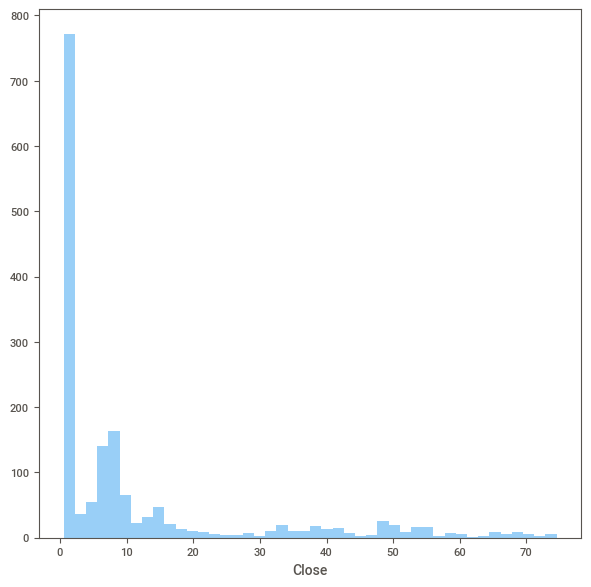

In [8]:
plt.figure(figsize=(7,7))
sns.distplot(data['Close'],kde = False)


The above Histogram shows us the division of closing price in our data set as we can see maximum percentage of the closing price in our dataset lies in the range of 0 to 10

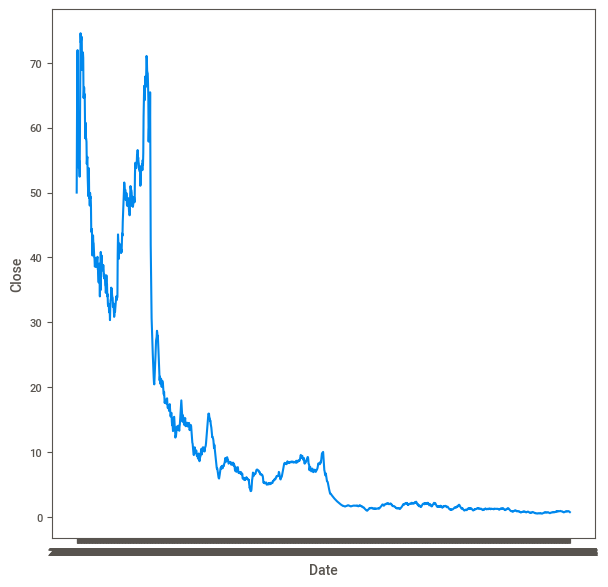

In [9]:
plt.figure(figsize=(7,7))
           
sns.lineplot(x='Date', y='Close', data=data)

The above time plot shows the corelation between the data and the closing price. It shows us how over the period of time the closing price of GOLD has been changing.

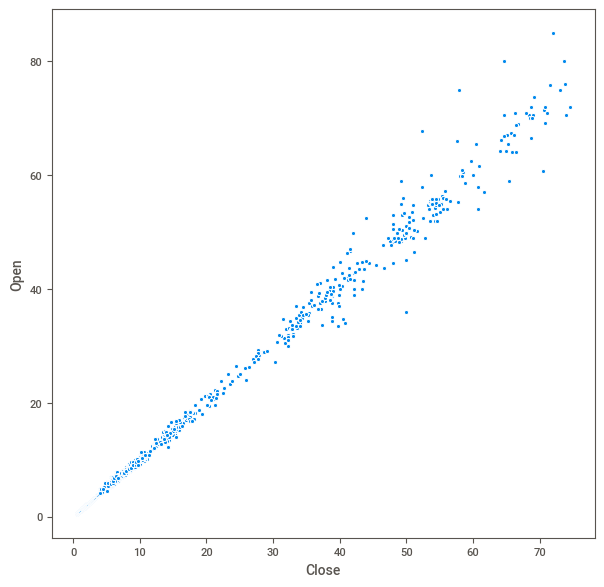

In [10]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Close", y="Open",data=data);

A scatterplot is a perfect way to show the relation between two numerical variables. And here we have 2 scatterplots i.e. the above and below graphs.

1. The relation between Open and close price
2. The relation between Close and Low price

From both the graphs we can see that there is a linear relation among these variables, which would be very helpful for us in deciding the model.

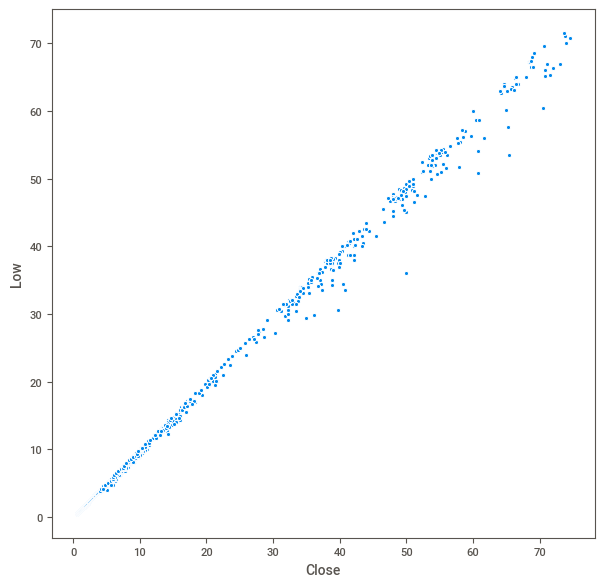

In [11]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Close", y="Low",data=data);

### Statistical Analysis

Statistical analysis is the collection and interpretation of data in order to uncover patterns and trends.

In [34]:
data.describe()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,S_3,S_9,next_day_price,Close_standardized
count,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1.651000e+03,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1.651000e+03
mean,11.428625,12.205924,11.256772,11.310939,11.718179,101856.568746,123.606299,1.672679e+06,76141.985463,88.619231,0.949152,-0.169764,11.665140,11.550853,11.732853,-5.433436e-17
std,15.820300,17.710868,16.159700,15.643146,16.923427,140760.210768,138.960457,2.944439e+06,96764.246977,16.673740,1.937861,1.300455,16.779670,16.597547,16.863972,1.000000e+00
min,0.755000,0.520000,0.500000,0.750000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,4.760000,0.000000,-17.150000,0.533333,0.561111,0.520000,-6.751160e-01
25%,1.350000,1.390000,1.320000,1.350000,1.343068,4738.000000,15.000000,7.415000e+03,4629.000000,78.655000,0.040000,-0.150000,1.348333,1.340000,1.350000,-6.367606e-01
50%,5.300000,5.450000,4.950000,5.160000,5.152128,34622.000000,73.000000,1.097050e+05,31200.000000,100.000000,0.180000,0.000000,5.153333,5.128889,5.170000,-3.932034e-01
75%,11.680000,12.065000,11.465000,11.610000,11.828637,153984.000000,186.000000,2.084949e+06,123906.000000,100.000000,0.890000,0.030000,11.513333,11.281667,11.835000,1.911771e-02
max,54.025000,84.950000,71.500000,53.950000,74.972394,849341.000000,752.000000,2.383048e+07,631381.000000,100.000000,23.300000,9.650000,73.816667,71.961111,74.550000,2.725734e+00


The above table shows the mean, median and differntial percentiles of the data. We can make the following observations from the above table 
  
1. The count is 1651.
2. The minimum Opening, closing, Low and high price are lower than 1
3. There is a significant difference between the 75% and the maximum values for the following Open, High, low, close, WAP which means there are outliers in these.

### Correlations Heat map

The easiest way to find the correlations between the features of a dataset is by creating a heat map which would visually help in figuring out which features are high interdependent and which are losely bounded to each other. 

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Open,1.000000,0.998643,0.997655,0.997073,0.997753,0.203504,0.634499,0.811155,0.233669,-0.351982,0.803577,-0.284317
High,0.998643,1.000000,0.997543,0.998452,0.998829,0.202500,0.634280,0.810742,0.231886,-0.355465,0.816759,-0.249672
Low,0.997655,0.997543,1.000000,0.998892,0.999184,0.202328,0.634288,0.811629,0.234216,-0.345867,0.774332,-0.231531
Close,0.997073,0.998452,0.998892,1.000000,0.999739,0.203406,0.636125,0.811758,0.234558,-0.349841,0.791669,-0.210180
WAP,0.997753,0.998829,0.999184,0.999739,1.000000,0.201985,0.635319,0.810902,0.233006,-0.349460,0.792668,-0.222151
No. of Shares,0.203504,0.202500,0.202328,0.203406,0.201985,1.000000,0.573866,0.542316,0.965298,-0.604743,0.162706,-0.051611
No. of Trades,0.634499,0.634280,0.634288,0.636125,0.635319,0.573866,1.000000,0.765381,0.569486,-0.500559,0.505152,-0.136711
Total Turnover,0.811155,0.810742,0.811629,0.811758,0.810902,0.542316,0.765381,1.000000,0.557574,-0.429188,0.638468,-0.193295
Deliverable Quantity,0.233669,0.231886,0.234216,0.234558,0.233006,0.965298,0.569486,0.557574,1.000000,-0.478062,0.165507,-0.046712
% Deli. Qty to Traded Qty,-0.351982,-0.355465,-0.345867,-0.349841,-0.349460,-0.604743,-0.500559,-0.429188,-0.478062,1.000000,-0.362187,0.114005


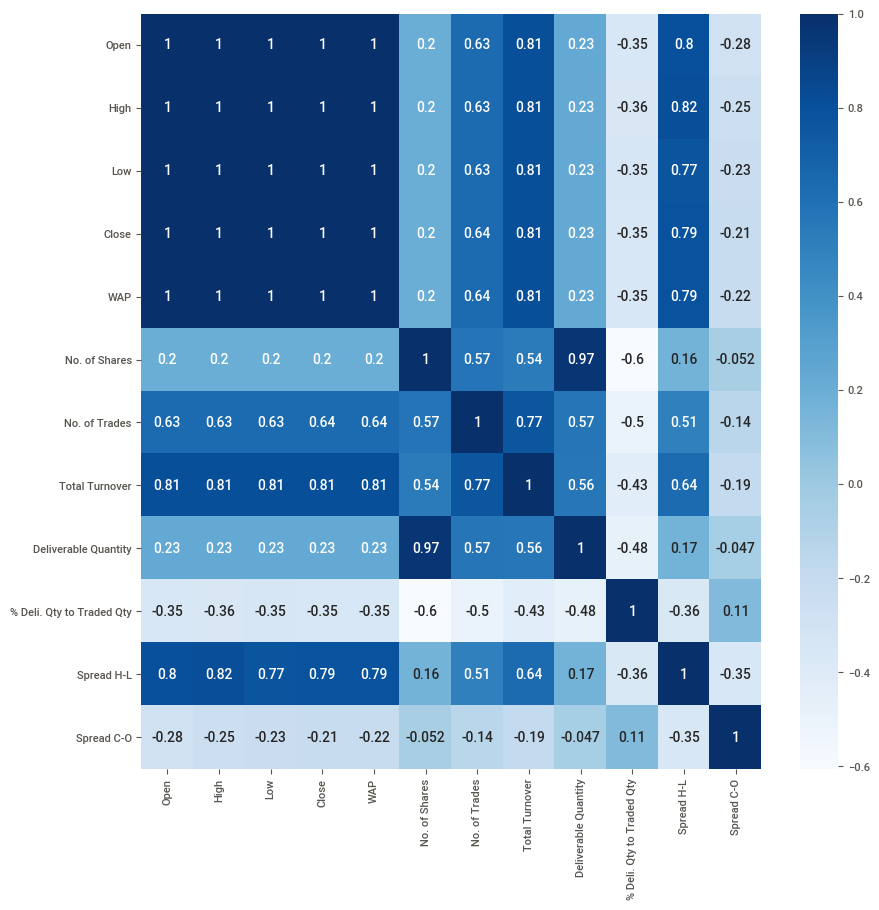

In [13]:
plt.figure(figsize=(10,10))
c= data.corr()
sns.heatmap(c,cmap='Blues',annot=True)
c

The heatmap visualized above shows us that

1. Open, Close, High, Low and WAP are highly correlated to each other.
2. Deliverable Quantity anf No. of Share are dependent on each other. 
3. Open, Close, High, Low and WAP are highly correlated with Spread H.L 


### Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x278c2744250>,
 'caps': [<matplotlib.lines.Line2D at 0x278c2744c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x278c2744490>],
 'medians': [<matplotlib.lines.Line2D at 0x278c2a0a460>],
 'fliers': [<matplotlib.lines.Line2D at 0x278c2a0a790>],
 'means': []}

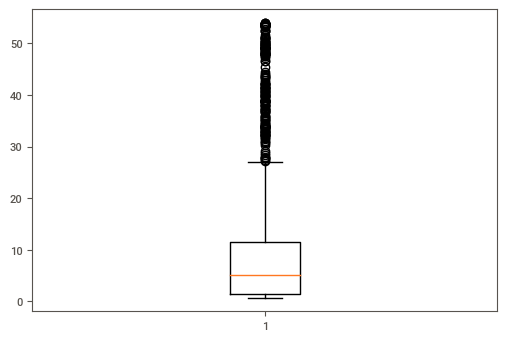

In [36]:
plt.boxplot(data["Close"])

As we already observe in the statistical analysis section that our data has lots of outliers, above is the visualization for the same for the feature "Close".


In the next section we will handle the outliers

### Feature Engineering

The results you achieve are a factor of the model you choose, the data you have available and the features you prepared. Even your framing of the problem and objective measures you’re using to estimate accuracy play a part. Your results are dependent on many inter-dependent properties. That's why it is important to implement feature engineering 

As we have already seen above there is no null values in our data. Therefore, there is no need of imputation

Neither does our data have any categorical values so there is no need of categorical imputaion as well.

There are 2 ways of handling outliers 

1. Dropping the data that constitute as the outlier
2. Capping the data

Since our data has lots of outliers it is not a smart move to just delete the data. therefore, instead of dropping we would be capping the outliers using the 95th percentile as the upper limit and 5th percentile as the lower limit.

In [26]:
upper_lim = data['Open'].quantile(.95)
lower_lim = data['Open'].quantile(.05)
data.loc[(data['Open'] > upper_lim),'Open'] = upper_lim
data.loc[(data['Open'] < lower_lim),"Open"] = lower_lim

C:\Users\23sah\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [27]:
upper_lim1 = data['Close'].quantile(.95)
lower_lim1 = data['Close'].quantile(.05)
data.loc[(data['Close'] > upper_lim),'Close'] = upper_lim1
data.loc[(data['Close'] < lower_lim),"Close"] = lower_lim1

### Standardization

Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

In [28]:
data['Close_standardized'] = (data['Close'] - data['Close'].mean()) / data['Close'].std()

<ipython-input-28-6ab70db760e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close_standardized'] = (data['Close'] - data['Close'].mean()) / data['Close'].std()
